In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!git clone https://github.com/Hashish58/FaceMaskDetection.git
%cd face_mask_detection

Cloning into 'FaceMaskDetection'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 11 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (11/11), 17.13 MiB | 16.72 MiB/s, done.
[Errno 2] No such file or directory: 'face_mask_detection'
/content/face_mask_detection


In [9]:
import cv2
import os
#TensorFlow is a free and open-source software library for machine learning and artificial intelligence
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
from google.colab.patches import cv2_imshow

faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_alt2.xml")
model = load_model("mask_recog.h5")


#The faceCascade object has a method detectMultiScale(),
 #which receives a frame(image) as an argument and runs the classifier cascade over the image.
#The term MultiScale indicates that the algorithm looks at subregions of the image in multiple scales,
#to detect faces of varying sizes.


def face_mask_detector(frame):
  # frame = cv2.imread(fileName)
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) #we need to convert the frame into greyscale.
  faces = faceCascade.detectMultiScale(gray,
                                        scaleFactor=1.1,
                                        minNeighbors=5,
                                        minSize=(60, 60),
                                        flags=cv2.CASCADE_SCALE_IMAGE)
  faces_list=[]
  preds=[]

#Let us go through these arguments of this function:

#scaleFactor – Parameter specifying how much the image size is reduced at each image scale.
#By rescaling the input image, you can resize a larger face to a smaller one,
#making it detectable by the algorithm. 1.05 is a good possible value for this,
#which means you use a small step for resizing,
#i.e. reduce the size by 5%, you increase the chance of a matching size with the model for detection is found.


#minNeighbors – Parameter specifying how many neighbors each candidate rectangle should have to retain it.
#This parameter will affect the quality of the detected faces.
#Higher value results in fewer detections but with higher quality. 3~6 is a good value for it.

#flags –Mode of operation

#minSize – Minimum possible object size. Objects smaller than that are ignored.






  #To show the detected face, we will draw a rectangle over it.OpenCV’s rectangle() draws rectangles over images, and
  #it needs to know the pixel coordinates of the top-left and bottom-right corners.
  #The coordinates indicate the row and column of pixels in the image. We can easily get these coordinates from
  #the variable face.
  for (x, y, w, h) in faces:
      face_frame = frame[y:y+h,x:x+w]
      face_frame = cv2.cvtColor(face_frame, cv2.COLOR_BGR2RGB)
      face_frame = cv2.resize(face_frame, (224, 224))
      face_frame = img_to_array(face_frame)
      face_frame = np.expand_dims(face_frame, axis=0)
      face_frame =  preprocess_input(face_frame)
      faces_list.append(face_frame)
      if len(faces_list)>0:
          preds = model.predict(faces_list)
      for pred in preds:
          (mask, withoutMask) = pred
      label = "Mask" if mask > withoutMask else "No Mask"
      color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
      label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
      cv2.putText(frame, label, (x, y- 10),
                  cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

      cv2.rectangle(frame, (x, y), (x + w, y + h),color, 3)
  # cv2_imshow(frame)
  return frame

#rectangle() accepts the following arguments:

#The original image
#The coordinates of the top-left point of the detection
#The coordinates of the bottom-right point of the detection
#The colour of the rectangle (a tuple that defines the amount of red, green, and blue (0-255)).In our case,
#we set as green just keeping the green component as 255 and rest as zero.
#The thickness of the rectangle lines

1/1 [==============================] - 0s 82ms/step


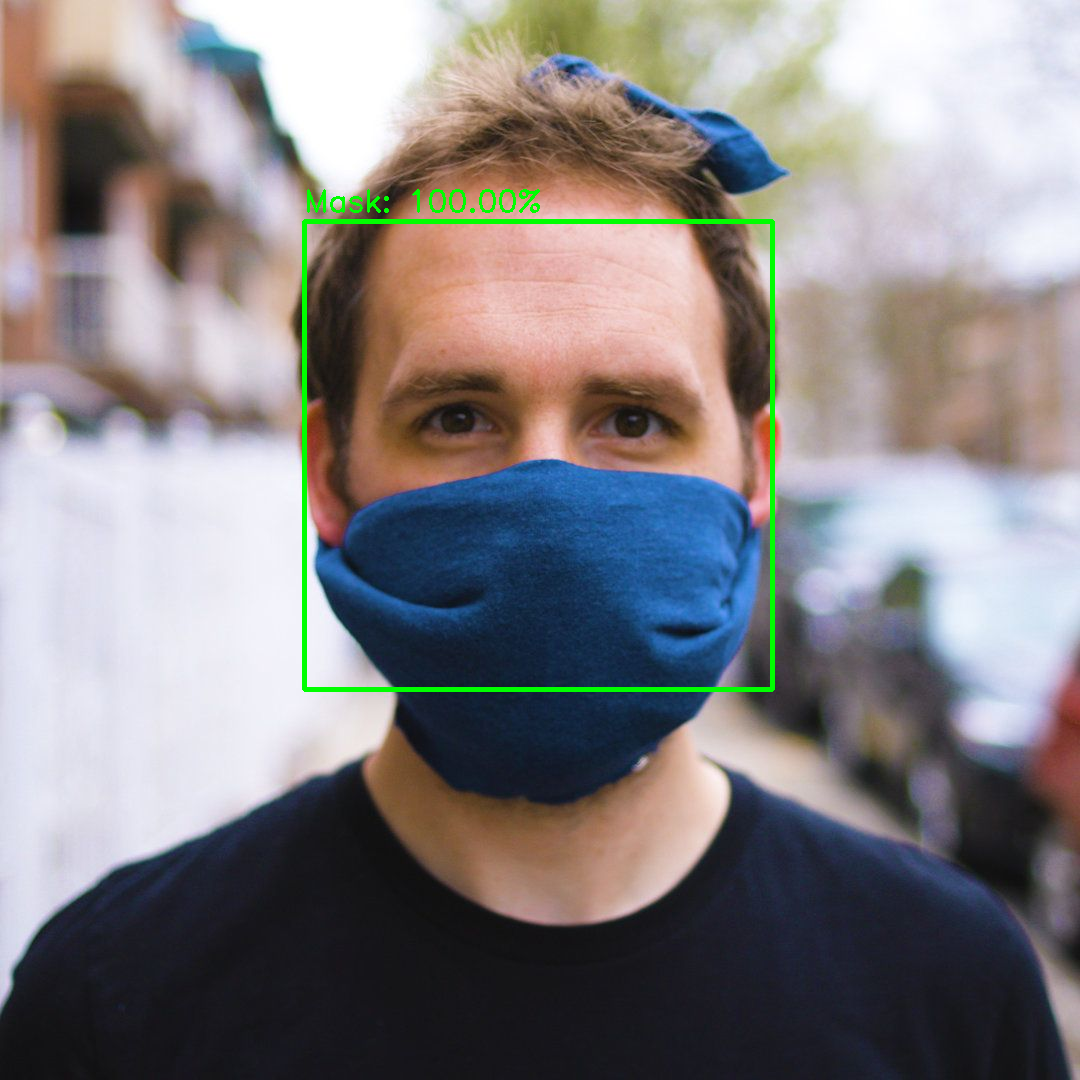

In [11]:
input_image = cv2.imread("/content/face_mask_detection/0fd8f8a309a6cc617e385c4d6e7325f6.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)

1/1 [==============================] - 0s 51ms/step


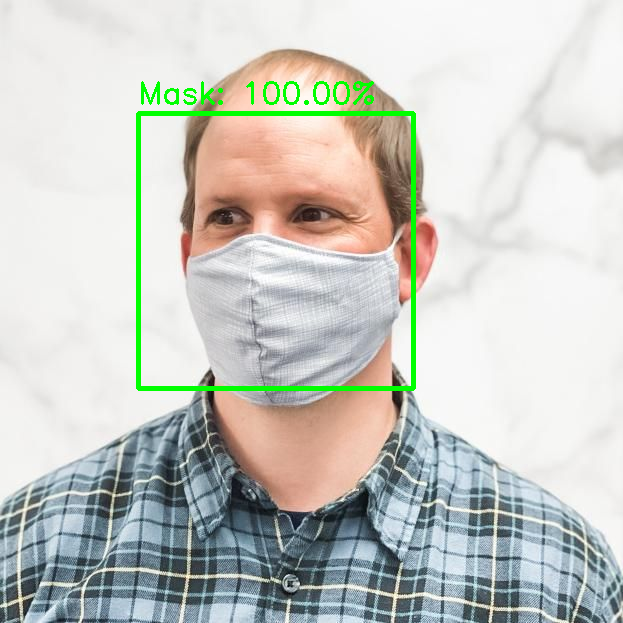

In [13]:
input_image=cv2.imread('/content/face_mask_detection/93f115c11ea3cb32ddfb31cc3330c23d.jpg')
output=face_mask_detector(input_image)
cv2_imshow(output)

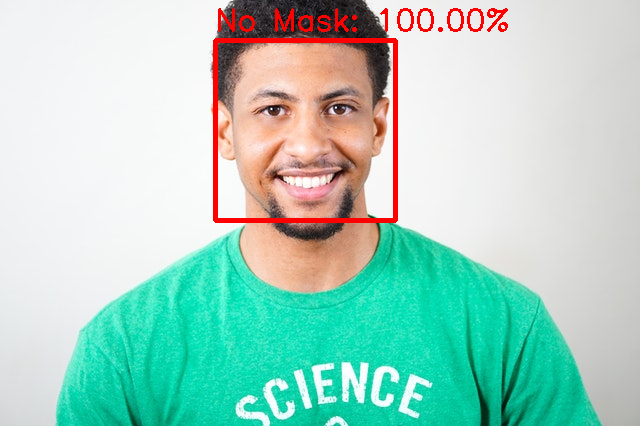

In [ ]:
input_image = cv2.imread("image4.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)

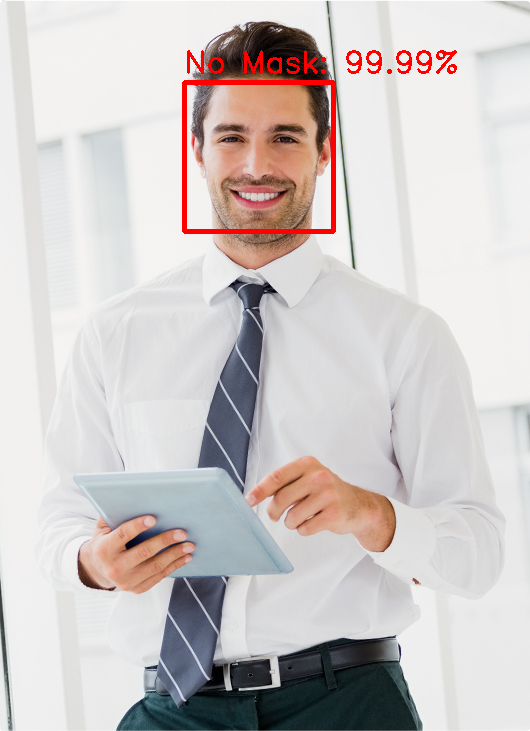

In [ ]:
input_image = cv2.imread("pic11.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)